In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing, csv file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
#loading the data
# The 'skip' value for 'on_bad_lines' will skip rows with errors
fake = pd.read_csv('/content/Fake.csv', on_bad_lines='skip')
true = pd.read_csv('/content/True.csv', on_bad_lines='skip')

In [ ]:
#checking how data looks like
fake.head(10)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
fake.tail(10)

,title,text,subject,date
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016"
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016"
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016"
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016"
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016"
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [ ]:
#checking different subjects and their counts
fake["subject"]

,subject
0,News
1,News
2,News
3,News
4,News
...,...
23476,Middle-east
23477,Middle-east
23478,Middle-east
23479,Middle-east


In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
true.subject.value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


In [ ]:
#creating category for classifying
fake["category"]=1
true["category"]=0

In [ ]:
#joining the data(the two df and reseting index)
df=pd.concat([fake,true]).reset_index(drop=True)

In [ ]:
#to check the data
df.head()


,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
df.tail()

,title,text,subject,date,category
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


<ipython-input-15-4c62b3dd1a77>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category", data=df, palette={'0': "skyblue", '1': "salmon"})


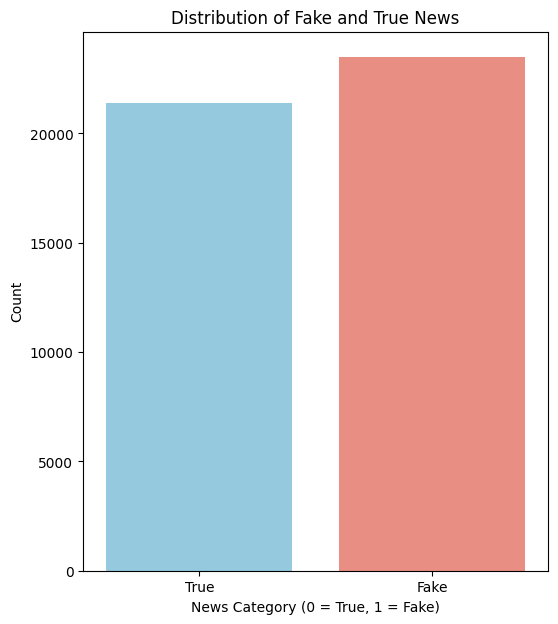

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting the figure size
plt.figure(figsize=(6,7))

# use a color palette to differentiate bars, using string keys for the palette
sns.countplot(x="category", data=df, palette={'0': "skyblue", '1': "salmon"})

plt.title("Distribution of Fake and True News")
plt.xlabel("News Category (0 = True, 1 = Fake)")
plt.ylabel("Count")
plt.xticks([0, 1], ['True', 'Fake'])  # optional: make x-axis clearer

plt.show()

<ipython-input-16-23c33ff8ee96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="subject", data=df, palette="Set2")  # or try "husl", "tab10", etc.


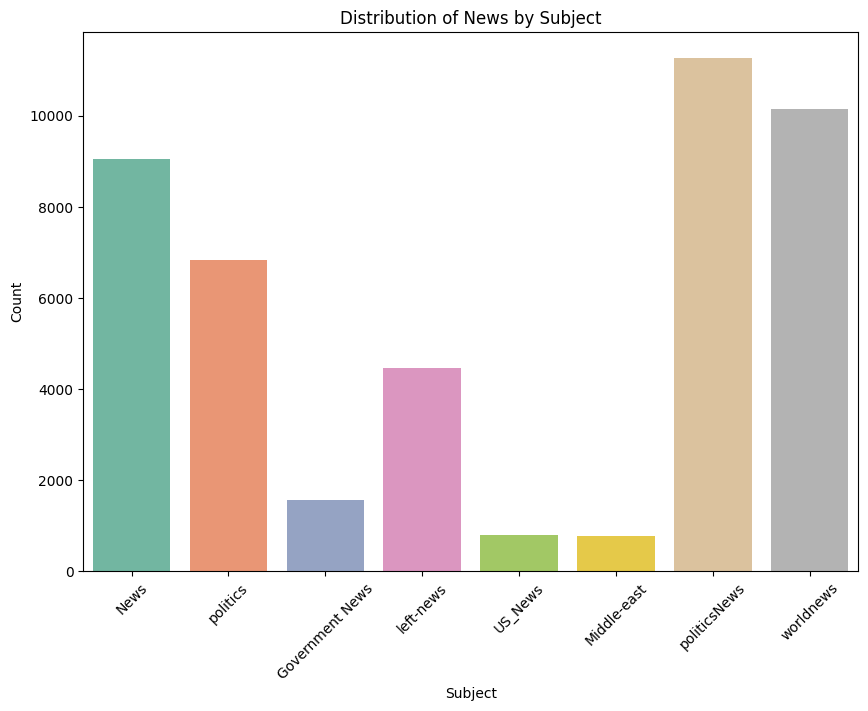

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x="subject", data=df, palette="Set2")  # or try "husl", "tab10", etc.
plt.title("Distribution of News by Subject")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)  # optional: rotate labels if there are many subjects
plt.show()


In [ ]:
df=df[["text", "category"]]

In [ ]:
df.head()

,text,category
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


DATA CLEANING

In [ ]:
df.isna()#.sum() *100/len(df)

,text,category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
44893,False,False
44894,False,False
44895,False,False
44896,False,False


In [ ]:
df.isna().sum()# *100/len(df)

,0
text,0
category,0


In [ ]:
df.isna().sum() *100/len(df)

,0
text,0.0
category,0.0


In [ ]:
#checking if there are empty strings in TEXT column
blanks=[]

#index, label and reviw of the doc
for index, text in df["text"].items(): # Use .items() instead of .iteritems()
  if text.isspace():
    blanks.append(index)

len(blanks)

631

In [ ]:
df.shape

(44898, 2)

In [ ]:
df.drop(blanks, inplace=True)

In [ ]:
df.shape

(44267, 2)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
nlp=spacy.load("en_core_web_sm")

In [ ]:
lemma=WordNetLemmatizer()

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
nlp=spacy.load("en_core_web_sm")

lemma=WordNetLemmatizer()

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLKT
list2=stopwords.words("english") # This line was causing the error
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


326
198
401


In [ ]:
def clean_text(text):

  string = ""
  #lower casting
  text=text.lower()

  #simplifying text
  text=re.sub(r"i'm", "i am", text)
  text=re.sub(r"he's", "he is", text)
  text=re.sub(r"she's", "she is", text)
  text=re.sub(r"that's", "that is", text)
  text=re.sub(r"what's", "what is", text)
  text=re.sub(r"where's", "where is", text)
  text=re.sub(r"\'ll", " will", text)
  text=re.sub(r"\'ve", " have", text)
  text=re.sub(r"\'re", " are", text)
  text=re.sub(r"\'d", " would", text)
  text=re.sub(r"won't", "will not", text)
  text=re.sub(r"can't", "cannot", text)
  text=re.sub(r"n't", " not", text)
  text=re.sub(r"n'", "ng", text)

  #removing any special character
  text=re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
  text=re.sub(r"\s+", " ", text)
  text=re.sub('[A-Za-z0-9]+', ' ', text)

  for word in text.split():
    if word not in Stopwords:
      string+=(lemma.lemmatize(word))+" "
  return string



In [ ]:
df["text"][10]

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [ ]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure required nltk data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load spacy model
nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # 2. Remove special characters and digits, keep only letters
    text = re.sub(r"[^A-Za-z\s]", '', text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Tokenize with spacy and lemmatize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']

    # 5. Remove stopwords and short tokens
    cleaned_tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    # 6. Join tokens back to string
    cleaned_text = " ".join(cleaned_tokens)

    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
clean_text(df["text"][10])

'centerpiece donald trump campaign presidency white supremacist way many public feud get involve people color one favorite target course player national football league dare exercise first amendment right kneel national anthem protest racist police brutality well one person figure racism bad business even get orange overlord elect founder pizza chain papa john sthis man never right side history number issue plus pizza suck decide complain player protest sale really drop turn racism pay know corporation bottom line therefore papa john schnatter long ceo hack pizza chainbreaking papa johns founder john schnatter step ceo announcement come week criticize nfl protest business news apbusiness december thing people certainly allow political opinion realize opinion often come dire consequence especially one business try garner sale support people one would presume goal ceo one know whether pressure shareholder public outcry boycott even nfl anything step right know perhaps future ceo run comp

In [ ]:
#cleaning the whole data
df["text"]=df["text"].apply(clean_text)

In [ ]:
df["text"]

,text
0,donald trump wish americans happy new year lea...
1,house intelligence committee chairman devin nu...
2,friday reveal former milwaukee sheriff david c...
3,christmas day donald trump announce would back...
4,pope francis use annual christmas day message ...
...,...
44893,brussels reuters nato ally tuesday welcome pre...
44894,london reuters lexisnexis provider legal regul...
44895,minsk reuter shadow disuse sovietera factory m...
44896,moscow reuter vatican secretary state cardinal...


Word Cloud

In [ ]:
from wordcloud import WordCloud

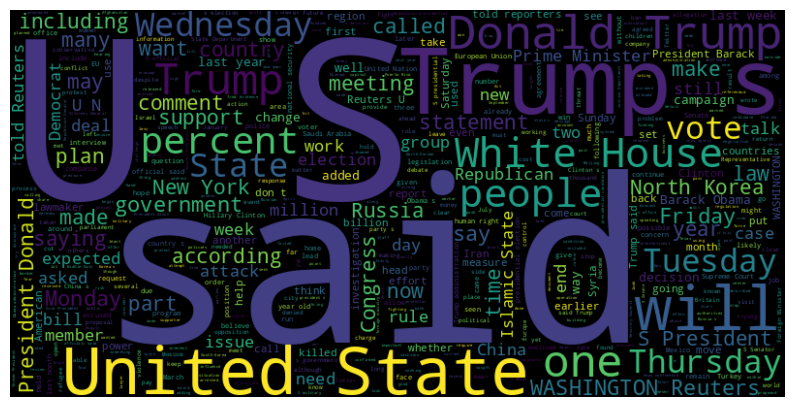

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load both datasets to create the 'category' column as you did before
fake = pd.read_csv('/content/Fake.csv', on_bad_lines='skip')
true = pd.read_csv('/content/True.csv', on_bad_lines='skip')

# Add the 'category' column
fake["category"] = 1
true["category"] = 0

# Combine the dataframes
df = pd.concat([fake, true]).reset_index(drop=True)

# Now you can create the word cloud
plt.figure(figsize=(10, 7))
Wc = WordCloud(max_words=500, width=800, height=400).generate(" ".join(df[df.category == 0].text))
plt.imshow(Wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#pil is pillow and used for image manipuation
from PIL import Image

In [ ]:
thumb="/content/true_wordcloud.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB", size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon) # Changed 'BOX' to 'box'
mask=np.array(mask)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving true_wordcloud.png to true_wordcloud (1).png


In [ ]:
mask = np.array(Image.open("true_wordcloud.png"))


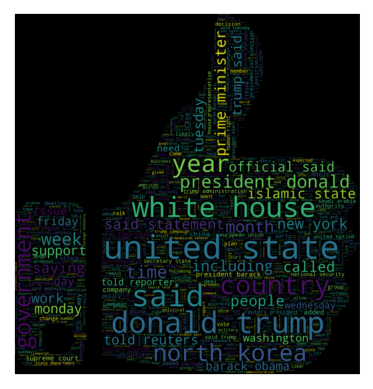

(558, 533, 4)


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preview the image to confirm it's the correct shape
img = Image.open("/content/true_wordcloud.png")
plt.imshow(img)
plt.axis("off")
plt.show()

# Convert to mask array
mask = np.array(img)

print(mask.shape)


In [ ]:

from google.colab import files
uploaded = files.upload()
mask = np.array(Image.open("/content/fake_wordcloud.png"))

Saving fake_wordcloud.png to fake_wordcloud (2).png


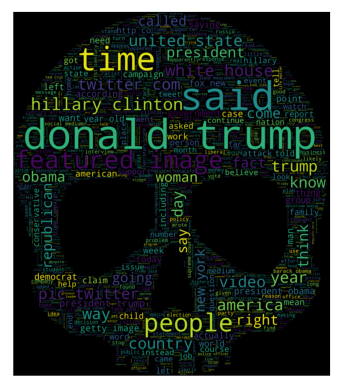

(829, 723, 4)


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preview the image to confirm it's the correct shape
img = Image.open("/content/fake_wordcloud.png")
plt.imshow(img)
plt.axis("off")
plt.show()

# Convert to mask array
mask = np.array(img)

print(mask.shape)


MODEL BUILDING

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your data is in 'Fake.csv' and 'True.csv'
fake = pd.read_csv('/content/Fake.csv', on_bad_lines='skip')
true = pd.read_csv('/content/True.csv', on_bad_lines='skip')

# Add category column
fake['category'] = 1
true['category'] = 0

# Concatenate dataframes
df = pd.concat([fake, true]).reset_index(drop=True)

# ... (rest of your code to clean the text in the 'df' DataFrame) ...

# Now you can split the data
X = df["text"]
y = df["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#tfidf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

In [4]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7515216 stored elements and shape (35918, 111424)>

Now, build SVM classifier, import linear svc

In [5]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

LinearSVC()

model is now trained on trained data. now training it on test data using pipelines.

In [6]:
from sklearn.pipeline import Pipeline
text_clf=Pipeline([("tfidf", TfidfVectorizer()), ("clf", LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

evaluate our predictions(how well our model performs)

In [7]:
prediction=text_clf.predict(X_test)

In [8]:
from sklearn import metrics
print (metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       1.00      1.00      1.00      4733

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [10]:
print(metrics.accuracy_score(y_test, prediction))

0.9951002227171493


In [11]:
print(metrics.confusion_matrix(y_test, prediction))

[[4225   22]
 [  22 4711]]
